# Requirements embedding evaluation (41 repositories / test set)

## 1. Loading repository information

In [20]:
!pip install gdown
!gdown 1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_

Downloading...
From: https://drive.google.com/uc?id=1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_
To: /content/repo_info_test.pkl
100% 19.8M/19.8M [00:00<00:00, 141MB/s]


In [21]:
import pickle

with open("repo_info_test.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [22]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

--2023-07-09 18:46:28--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 18:46:29 (114 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [23]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [24]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest",
]

In [25]:
from unixcoder import UniXcoder

unixcoder_models = {}

# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)
    unixcoder_models[u_name].to(device)

## 3. Generating requirements embeddings

In [26]:
# Getting requirements embeddings
def get_unixcoder_embeddings(data, model):
    tokens_ids = model.tokenize([data], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    return embeddings

# Getting other embbeddings
def get_other_embeddings(data_list):
    embeddings = {}

    # Unixcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - ")
        embeddings_list = torch.concat([get_unixcoder_embeddings(data, u_model) for data in data_list])
        embeddings[u_name] = embeddings_list

    return embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "requirements":
            return get_other_embeddings(input_data)


In [27]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating requirements embeddings for {repo_name} - ")
    repo_dict["requirements_embeddings"] = get_embeddings(input_data=repo_dict["requirements"],
                                                          input_mode="requirements")

  0%|          | 0/41 [00:00<?, ?it/s]

 - Generating requirements embeddings for ellisonleao/pyshorteners - 



100%|██████████| 1/1 [00:00<00:00, 18.48it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for sloria/doitlive - 



  5%|▍         | 2/41 [00:00<00:03, 11.51it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for sebastien/cuisine - 



100%|██████████| 1/1 [00:00<00:00, 60.43it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for lepture/authlib - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 10%|▉         | 4/41 [00:00<00:04,  9.21it/s]

 - Generating requirements embeddings for inducer/pudb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 12%|█▏        | 5/41 [00:01<00:08,  4.01it/s]

 - Generating requirements embeddings for uber/pyflame - 



100%|██████████| 1/1 [00:00<00:00, 69.08it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for aws/aws-cli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 17%|█▋        | 7/41 [00:01<00:06,  5.19it/s]

 - Generating requirements embeddings for DamnWidget/anaconda - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 20%|█▉        | 8/41 [00:02<00:11,  2.91it/s]

 - Generating requirements embeddings for pykong/copier - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 22%|██▏       | 9/41 [00:02<00:11,  2.89it/s]

 - Generating requirements embeddings for FactoryBoy/factory_boy - 



 24%|██▍       | 10/41 [00:02<00:08,  3.46it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for pynamodb/PynamoDB - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 27%|██▋       | 11/41 [00:02<00:07,  4.17it/s]

 - Generating requirements embeddings for jschneier/django-storages - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 29%|██▉       | 12/41 [00:02<00:05,  4.91it/s]

 - Generating requirements embeddings for robotframework/robotframework - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 32%|███▏      | 13/41 [00:03<00:06,  4.51it/s]

 - Generating requirements embeddings for mininet/mininet - 



100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for ztane/python-Levenshtein - 



 37%|███▋      | 15/41 [00:03<00:03,  6.89it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for audreyr/cookiecutter - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


 - Generating requirements embeddings for google/python-fire - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 41%|████▏     | 17/41 [00:03<00:03,  7.26it/s]

 - Generating requirements embeddings for pycco-docs/pycco - 



100%|██████████| 1/1 [00:00<00:00, 13.32it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for rossgoodwin/hmap - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 46%|████▋     | 19/41 [00:03<00:02,  9.37it/s]

 - Generating requirements embeddings for idan/oauthlib - 



100%|██████████| 1/1 [00:00<00:00, 38.17it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for paramiko/paramiko - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 51%|█████     | 21/41 [00:03<00:01, 10.24it/s]

 - Generating requirements embeddings for kevin1024/vcrpy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


 - Generating requirements embeddings for platformio/platformio-core - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 56%|█████▌    | 23/41 [00:06<00:09,  1.97it/s]

 - Generating requirements embeddings for graphql-python/graphene - 



 59%|█████▊    | 24/41 [00:06<00:07,  2.31it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for klen/mixer - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 61%|██████    | 25/41 [00:06<00:06,  2.66it/s]

 - Generating requirements embeddings for seatgeek/sixpack - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 63%|██████▎   | 26/41 [00:06<00:05,  2.96it/s]

 - Generating requirements embeddings for bpython/bpython - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 66%|██████▌   | 27/41 [00:07<00:05,  2.42it/s]

 - Generating requirements embeddings for dfunckt/django-rules - 



 68%|██████▊   | 28/41 [00:07<00:04,  2.98it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for coleifer/peewee - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 71%|███████   | 29/41 [00:07<00:03,  3.48it/s]

 - Generating requirements embeddings for pythonnet/pythonnet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 73%|███████▎  | 30/41 [00:07<00:02,  3.84it/s]

 - Generating requirements embeddings for python/typeshed - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 76%|███████▌  | 31/41 [00:08<00:02,  3.93it/s]

 - Generating requirements embeddings for KoffeinFlummi/Chronyk - 



100%|██████████| 1/1 [00:00<00:00, 25.63it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for isnowfy/snownlp - 



100%|██████████| 1/1 [00:00<00:00, 65.33it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for alecthomas/voluptuous - 



 83%|████████▎ | 34/41 [00:08<00:00,  7.44it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for spulec/freezegun - 



100%|██████████| 1/1 [00:00<00:00, 25.12it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for maxmind/geoip-api-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 22.53it/s]


 - Generating requirements embeddings for pallets/werkzeug - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 90%|█████████ | 37/41 [00:08<00:00,  7.32it/s]

 - Generating requirements embeddings for nvbn/thefuck - 



100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating requirements embeddings for benfred/implicit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 95%|█████████▌| 39/41 [00:09<00:00,  7.04it/s]

 - Generating requirements embeddings for erikrose/more-itertools - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 16.94it/s]


 - Generating requirements embeddings for PyMySQL/mysqlclient-python - 



100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 41/41 [00:09<00:00,  4.43it/s]


## 4. Saving requirements embeddings

In [28]:
# Change the tensor format to CPU
save_device = "cpu"

for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["requirements_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["requirements_embeddings"] = repo_info[repo_name]["requirements_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["requirements_embeddings"].items():
            repo_info[repo_name]["requirements_embeddings"][model_name] = model_tensor.to(save_device)


In [29]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["requirements_embeddings"]) is torch.Tensor:
        print(repo_dict["requirements_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["requirements_embeddings"].items():
             print(repo_info[repo_name]["requirements_embeddings"][model_name].get_device())


-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [30]:
with open("repo_info_test_requirements_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [31]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

models = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in models:

        if type(repo_info[repo1]["requirements_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["requirements_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["requirements_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["requirements_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["requirements_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["requirements_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + models)
df

100%|██████████| 820/820 [00:00<00:00, 13536.56it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.625271
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.638544
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.631954
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.549288
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.687557
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.445335
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.560347
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.411217
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,0.490748


In [32]:
df.dropna(inplace=True, subset=models)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.625271
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.638544
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.631954
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.549288
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.687557
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.445335
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.560347
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.411217
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,0.490748


In [33]:
df.to_csv("requirements_embedding_evaluation_test_41.csv")

## 6. Evaluating different models

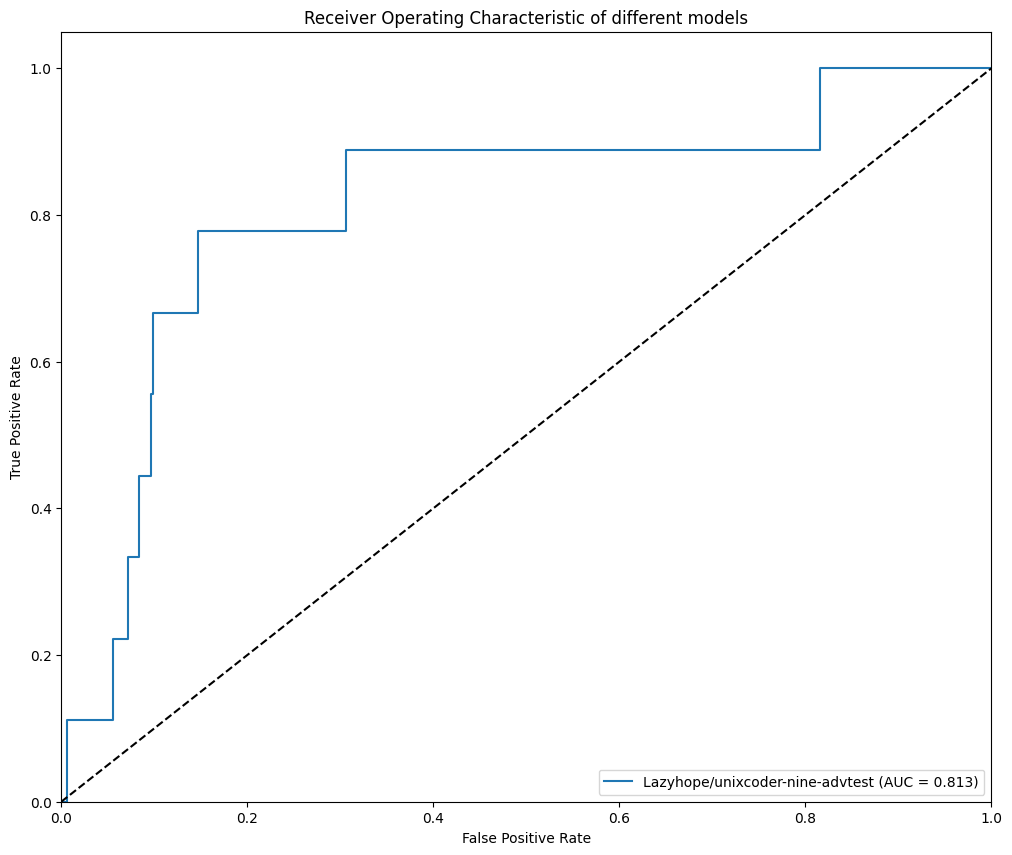

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))


def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)


for model in models:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_requirements_evaluation_test_41.png')
plt.show()

In [35]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.8132620906973558}